# . Introduction


    Many apps today are used by people fundamentally to stay in touch with each other. Some are used to help with relaxing, assist with our fantasies (movies and music), for gaming and many more. Some of these apps are free and some are paid for. Factually speaking, it is easier for a large population to move towards free app download as opposed to paid application because nobody really loves to spend money on an app that they could get for free. But from our analysis with this data, we see a strikingly different outcome where more of our customers are paid users and have family responsibilities. Below, we would make use of data exploration techniques, segmenting our data and running some unsupervised learning algorithms to help us better understand mobile app download as it relates to consumer behavior. 

In [1]:
# importing packages

import numpy             as np                          # mathematical essentials
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn           as sns                         # enhanced visualization
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

# loading data and setting display options

# loading data
mobile_apps_df = pd.read_excel('./Mobile_App_Survey_Data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [2]:
# scree_plot

def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/mobile_app_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

# . Checking the data for it's information and missing values

    We'll use the .info() built-in function to check the overall information of our data.

In [3]:
mobile_apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 88 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   caseID  1552 non-null   int64
 1   q1      1552 non-null   int64
 2   q2r1    1552 non-null   int64
 3   q2r2    1552 non-null   int64
 4   q2r3    1552 non-null   int64
 5   q2r4    1552 non-null   int64
 6   q2r5    1552 non-null   int64
 7   q2r6    1552 non-null   int64
 8   q2r7    1552 non-null   int64
 9   q2r8    1552 non-null   int64
 10  q2r9    1552 non-null   int64
 11  q2r10   1552 non-null   int64
 12  q4r1    1552 non-null   int64
 13  q4r2    1552 non-null   int64
 14  q4r3    1552 non-null   int64
 15  q4r4    1552 non-null   int64
 16  q4r5    1552 non-null   int64
 17  q4r6    1552 non-null   int64
 18  q4r7    1552 non-null   int64
 19  q4r8    1552 non-null   int64
 20  q4r9    1552 non-null   int64
 21  q4r10   1552 non-null   int64
 22  q4r11   1552 non-null   int64
 23  q11     1552 

In [4]:
#Using .shape to find the dimensions of the dataset
mobile_apps_df.shape

(1552, 88)

    We'll use the .head() built-in function to try understand the data a little bit more

In [5]:
mobile_apps_df.head(n=5)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,5,3,3,5,5,4,5,3,4,3,3,3,5,5,4,5,4,5,4,5,3,3,4,5,5,2,3,3,3,5,5,3,4,6,4,4,4,4,4,4,3,4,1,0,0,0,0,2,2,5,1
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,2,2,1,2,1,2,2,2,1,2,2,2,2,1,1,3,2,2,1,1,2,2,2,2,2,5,1,0,1,1,0,0,3,2,10,2
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3,5,3,2,3,3,3,2,3,3,4,5,3,3,5,4,2,5,5,4,4,4,3,3,4,6,1,4,3,5,6,5,5,5,3,5,5,4,5,3,3,4,4,0,0,0,1,0,2,2,6,1
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4,2,1,1,2,1,1,1,2,2,2,2,3,2,2,2,2,1,2,1,3,2,2,2,1,3,1,1,2,2,4,3,2,2,2,3,2,3,2,2,2,2,1,0,1,1,0,0,1,2,5,1
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2,3,3,3,2,2,3,3,2,3,3,2,2,3,2,3,3,3,3,3,2,2,2,1,1,2,2,1,4,3,3,3,2,3,3,3,3,3,2,3,1,5,2,1,0,0,0,0,3,2,4,2


    After running the code above, we noticed that just a few of our data compared to the entire data was skewed, so we decided no to log-transform our variables

In [6]:
# Segmenting our data
demographic = ['caseID', 'q1', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57']

behavioral = ['q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 
              'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1',	
              'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12']

psychometric = ['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 
                'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 
                'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10',	
                'q26r11', 'q26r12',	'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']


In [7]:
# dropping demographic information and psychometric information
download_behavior = mobile_apps_df.drop(demographic,                                                                               
                                      axis = 1)

download_behavior_2 = download_behavior.drop(psychometric, axis = 1)

download_behavior_2.head(5)

,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4
1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3
3,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2


     Scale our segmented data starting with behavioural, then psychometric 

     Scaling our behavioral features both column and rows

In [8]:
# scaling (normalizing) variables before correlation analysis

# applying the unsupervised_scaler function
behavior_scaled = unsupervised_scaler(df = download_behavior_2)

# checking pre- and post-scaling variance

#print(np.var(download_behavior_2), '\n\n')
#print(np.var(behavior_scaled))


In [9]:
download_behavior_2.columns

Index(['q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12'], dtype='object')

In [10]:
 # Scaling the behavioral variables row-wise

result = download_behavior_2.transpose()



In [11]:
# Scaling the rows of the behavioral features

# applying the unsupervised_scaler function
behavior_scaled = unsupervised_scaler(df = result)

# Transpose to get back the columns
download_behavior_2 = behavior_scaled.transpose()

# checking pre- and post-scaling variance

#print(np.var(result), '\n\n')
#print(np.var(behavior_scaled))


In [12]:
# Changing the column names back to it's original name after transposing

download_behavior_2.columns = ['q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 
                               'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 
                               'q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12']
download_behavior_2.head(n = 3)

,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12
0,-0.781230,-0.781230,-0.223209,-0.781230,-0.781230,-0.781230,-0.781230,-0.781230,-0.781230,-0.781230,-0.781230,-0.781230,-0.781230,-0.781230,-0.781230,-0.223209,-0.781230,-0.781230,-0.781230,-0.781230,-0.781230,-0.223209,-0.223209,-0.223209,1.450856,1.450856,1.450856,1.450856,1.450856,1.450856,1.450856,1.450856,1.450856,1.450856,1.450856
1,-0.958234,-0.958234,0.058075,-0.958234,-0.958234,-0.958234,-0.958234,-0.958234,-0.958234,-0.958234,-0.958234,0.058075,0.058075,0.058075,-0.958234,-0.958234,-0.958234,-0.958234,0.058075,-0.958234,-0.958234,2.090692,2.090692,0.058075,1.074384,1.074384,0.058075,1.074384,1.074384,1.074384,1.074384,1.074384,1.074384,1.074384,1.074384
2,-0.795472,-0.795472,-0.795472,-0.795472,-0.190221,-0.795472,-0.795472,-0.795472,-0.795472,-0.795472,-0.795472,-0.795472,-0.795472,-0.795472,-0.190221,-0.190221,-0.795472,-0.795472,-0.795472,-0.795472,-0.795472,-0.190221,2.230779,-0.190221,1.020279,1.625529,0.415029,1.625529,0.415029,1.625529,1.625529,0.415029,1.625529,1.625529,1.020279


 Scaling our psychometric features both columns and rows

In [13]:
# dropping demographic information and behavioral information
download_psych = mobile_apps_df.drop(demographic,                                                                               
                                      axis = 1)

download_psych_2 = download_psych.drop(behavioral, axis = 1)

download_psych_2.columns

Index(['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17'], dtype='object')

In [14]:
# scaling (normalizing) variables before correlation analysis

# applying the unsupervised_scaler function
psych_scaled = unsupervised_scaler(df = download_psych_2)

# checking pre- and post-scaling variance

#print(np.var(download_psych_2), '\n\n')
#print(np.var(psych_scaled))


In [15]:
 # Scaling the psychometric variables row-wise

result2 = download_psych_2.transpose()

In [16]:
# Scaling the rows of the psychometric feature

# applying the unsupervised_scaler function
psych_scaled = unsupervised_scaler(df = result2)

# Transpose to get back the columns
download_psych_2 = psych_scaled.transpose()

# checking pre- and post-scaling variance

#print(np.var(result2), '\n\n')
#print(np.var(result_scaled2))


In [17]:
# Changing the column names back to it's original name after transposing

download_psych_2.columns = ['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 
                'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 
                'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10',	
                'q26r11', 'q26r12',	'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']
download_psych_2.head(n = 3)

,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17
0,1.073847,-1.128916,-1.128916,1.073847,1.073847,-0.027535,1.073847,-1.128916,-0.027535,-1.128916,-1.128916,-1.128916,1.073847,1.073847,-0.027535,1.073847,-0.027535,1.073847,-0.027535,1.073847,-1.128916,-1.128916,-0.027535,1.073847,1.073847,-2.230297,-1.128916,-1.128916,-1.128916,1.073847,1.073847,-1.128916,-0.027535,2.175228,-0.027535,-0.027535,-0.027535,-0.027535,-0.027535,-0.027535
1,-1.059784,-1.059784,0.783319,-1.059784,-1.059784,-1.059784,-1.059784,-1.059784,-1.059784,-1.059784,0.783319,0.783319,-1.059784,0.783319,-1.059784,0.783319,0.783319,-1.059784,0.783319,-1.059784,0.783319,0.783319,0.783319,-1.059784,0.783319,0.783319,0.783319,0.783319,-1.059784,-1.059784,2.626421,0.783319,0.783319,-1.059784,-1.059784,0.783319,0.783319,0.783319,0.783319,0.783319
2,1.013392,-0.711531,-1.573992,-0.711531,-0.711531,-0.711531,-1.573992,-0.711531,-0.711531,0.150931,1.013392,-0.711531,-0.711531,1.013392,0.150931,-1.573992,1.013392,1.013392,0.150931,0.150931,0.150931,-0.711531,-0.711531,0.150931,1.875854,-2.436454,0.150931,-0.711531,1.013392,1.875854,1.013392,1.013392,1.013392,-0.711531,1.013392,1.013392,0.150931,1.013392,-0.711531,-0.711531


# . Determining the number of principal components</b>

<h5>The following codes will include instantiating, fitting, and transforming a PCA model with no limits to its number of principal components. We will be using the scaled datasets for this.</h5>

<h5>Instantiating a <em>PCA</em> for the <b>behavioral data</b></h5>

In [18]:
# INSTANTIATING a PCA object with no limit to principal components for the behavioral scaled data
pca = PCA(n_components = None,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(download_behavior_2)


# comparing dimensions of each DataFrame
print("Original shape:", download_behavior_2.shape)
print("PCA shape     :", customer_pca.shape)

Original shape: (1552, 35)
PCA shape     : (1552, 35)


<h3>Evaluating PCA Algorithms</h3>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

    a) Using a loop to print out each explained variance ratio.
    The code below will loop over each principal component, printing its component number as well as its explained variance ratio.

In [19]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    #print(f"PC {component_number}: {variance.round(3)}")

In [20]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum())

1.0


<h5>Instantiating a <em>PCA</em> for the <b>psychometric data</b></h5>

In [21]:
# INSTANTIATING a PCA object with no limit to principal components for the psychometric scaled data
pca2 = PCA(n_components = None,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca2 = pca2.fit_transform(download_psych_2)


# comparing dimensions of each DataFrame
print("Original shape:", download_psych_2.shape)
print("PCA shape     :", customer_pca2.shape)

Original shape: (1552, 40)
PCA shape     : (1552, 40)


<h4>b) Looping to print out each explained variance ratio.</h4>

In [22]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca2.explained_variance_ratio_:
    component_number += 1
    
    #print(f"PC {component_number}: {variance.round(3)}")

In [23]:
# printing the sum of all explained variance ratios
print(pca2.explained_variance_ratio_.sum())

1.0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Scree Plots</strong><br>


    The scree plots will be used to visualize the explained variance of each principal component. Our goal in analyzing this plot is to look for a point where there is a drop in the marginal return of explained variance. In other words, we are looking for an "elbow" in the plot, where the line connecting each principal component becomes less steep.<br><br>
<h5>c) Calling the scree_plot function on the PCA objects.</h5>

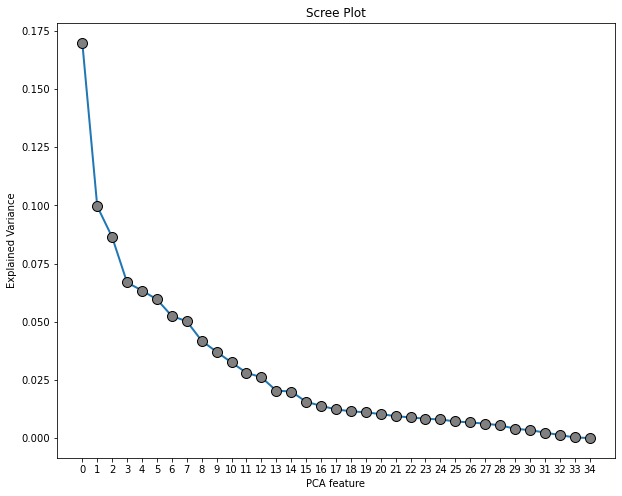

In [24]:
# calling the scree_plot function for behavioral features

scree_plot(pca_object = pca,
           export = False)

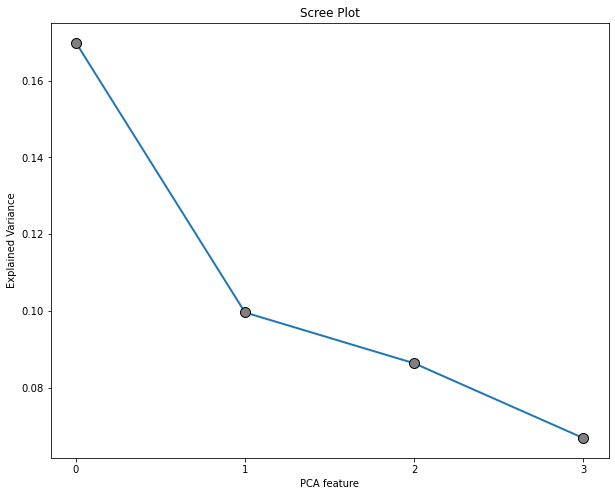

In [25]:
# INSTANTIATING a new PCA model using the first three principal components for behavioral features
pca_4 = PCA(n_components = 4,
            random_state = 219)


# FITTING and TRANSFORMING the download_behavior_2
customer_pca_4 = pca_4.fit_transform(download_behavior_2)


# calling the scree_plot function
scree_plot(pca_object = pca_4, 
           export = False)

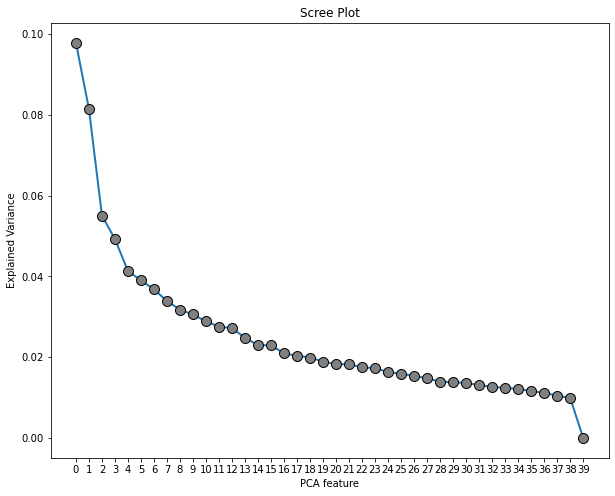

In [26]:
 # calling the scree_plot function for psychometric features

scree_plot(pca_object = pca2,
           export = False)

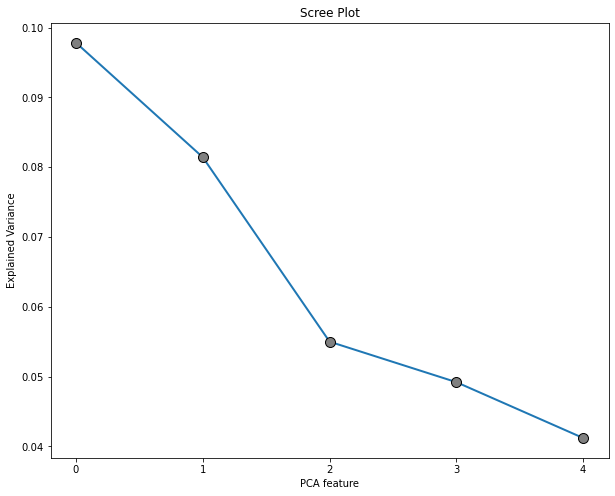

In [27]:
# INSTANTIATING a new PCA model using the first three principal components for psychometric features
pca_5 = PCA(n_components = 5,
            random_state = 219)


# FITTING and TRANSFORMING the download_psych_2
customer_pca_5 = pca_5.fit_transform(download_psych_2)


# calling the scree_plot function
scree_plot(pca_object = pca_5, 
           export = False)

# . Interpreting Principal Components and Persona Development<br>

a) Analyze the PC factor loadings.
The following code will be run to analyze the factor loadings and develop a persona for each principal component after which renaming the columns with the persona names will be done.

In [28]:
# transposing pca components of download behavioral features
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(download_behavior_2.columns)


# checking the result
#print(factor_loadings_df)


# saving to Excel
#factor_loadings_df.to_excel('./team_1_assignment/behavior_factor_loadings.xlsx')

In [29]:
# transposing pca components of download psychometric features

factor_loadings2_df = pd.DataFrame(np.transpose(pca2.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings2_df = factor_loadings2_df.set_index(download_psych_2.columns)


# checking the result
#print(factor_loadings2_df)


# saving to Excel
factor_loadings2_df.to_excel('./team_1_assignment/psych_factor_loadings2.xlsx')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Analyze and name each principal component based on its factor loading.


In [30]:
# naming each principal component for behavioral features
factor_loadings_df.columns = ['Free_download_users',
                              'Millennials',
                              'Paid_download_users',
                              'Twitter_fans',
                              '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
                              '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', 
                              '26', '27', '28', '29', '30', '31', '32', '33', '34']


# checking the result
#factor_loadings_df

In [31]:
# naming each principal component for psychometric features
factor_loadings2_df.columns = ['Leaders_mentality',
                              'Average_spender',
                              'Gadget_lovers',
                              'Family_person',
                              'A_parent',
                              '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
                              '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', 
                              '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']


# checking the result
#factor_loadings2_df

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

   <strong>Customer-Level Personas</strong><br>
        Now that we have developed personas, we can analyze how much each customer fits into each group. 

In [32]:
# converting the behavioral PCA into a DataFrame 
customer_pca = pd.DataFrame(customer_pca)


# renaming columns
customer_pca.columns = factor_loadings_df.columns


In [33]:
# converting the psychometric PCA into a DataFrame 
customer_pca2 = pd.DataFrame(customer_pca2)


# renaming columns
customer_pca2.columns = factor_loadings2_df.columns



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>




In [34]:
# exploring customers persona by behavioral features
print(f"""
Free Download Users
-----------------------------------------      
Positive Affinity : {len(customer_pca['Free_download_users'][customer_pca['Free_download_users'] > 1.0 ])} 
Negative Affinity : {len(customer_pca['Free_download_users'][customer_pca['Free_download_users'] > -1.0 ])}      

MIllennials
-----------------------------------------      
Positive Affinity : {len(customer_pca['Millennials'][customer_pca['Millennials'] > 1.0 ])} 
Negative Affinity : {len(customer_pca['Millennials'][customer_pca['Millennials'] > -1.0 ])}

Paid Download Users
-----------------------------------------      
Positive Affinity : {len(customer_pca['Paid_download_users'][customer_pca['Paid_download_users'] > 1.0 ])} 
Negative Affinity : {len(customer_pca['Paid_download_users'][customer_pca['Paid_download_users'] > -1.0 ])}

Twitter Fans
-----------------------------------------      
Positive Affinity : {len(customer_pca['Twitter_fans'][customer_pca['Twitter_fans'] > 1.0 ])} 
Negative Affinity : {len(customer_pca['Twitter_fans'][customer_pca['Twitter_fans'] > -1.0 ])}      
      
      """)


Free Download Users
-----------------------------------------      
Positive Affinity : 231 
Negative Affinity : 1304      

MIllennials
-----------------------------------------      
Positive Affinity : 203 
Negative Affinity : 1342

Paid Download Users
-----------------------------------------      
Positive Affinity : 165 
Negative Affinity : 1377

Twitter Fans
-----------------------------------------      
Positive Affinity : 116 
Negative Affinity : 1420      
      
      


In [35]:
# exploring customers persona by psychometric features
print(f"""
Leaders Mentality
-----------------------------------------      
Positive Affinity : {len(customer_pca2['Leaders_mentality'][customer_pca2['Leaders_mentality'] > 1.0 ])} 
Negative Affinity : {len(customer_pca2['Leaders_mentality'][customer_pca2['Leaders_mentality'] > -1.0 ])}      

Average Spender
-----------------------------------------      
Positive Affinity : {len(customer_pca2['Average_spender'][customer_pca2['Average_spender'] > 1.0 ])} 
Negative Affinity : {len(customer_pca2['Average_spender'][customer_pca2['Average_spender'] > -1.0 ])}

Gadget Lovers
-----------------------------------------      
Positive Affinity : {len(customer_pca2['Gadget_lovers'][customer_pca2['Gadget_lovers'] > 1.0 ])} 
Negative Affinity : {len(customer_pca2['Gadget_lovers'][customer_pca2['Gadget_lovers'] > -1.0 ])}

Family Person
-----------------------------------------      
Positive Affinity : {len(customer_pca2['Family_person'][customer_pca2['Family_person'] > 1.0 ])} 
Negative Affinity : {len(customer_pca2['Family_person'][customer_pca2['Family_person'] > -1.0 ])} 

A Parent
-----------------------------------------      
Positive Affinity : {len(customer_pca2['A_parent'][customer_pca2['A_parent'] > 1.0 ])} 
Negative Affinity : {len(customer_pca2['A_parent'][customer_pca2['A_parent'] > -1.0 ])}     
      
      """)


Leaders Mentality
-----------------------------------------      
Positive Affinity : 485 
Negative Affinity : 1046      

Average Spender
-----------------------------------------      
Positive Affinity : 407 
Negative Affinity : 1120

Gadget Lovers
-----------------------------------------      
Positive Affinity : 324 
Negative Affinity : 1221

Family Person
-----------------------------------------      
Positive Affinity : 342 
Negative Affinity : 1221 

A Parent
-----------------------------------------      
Positive Affinity : 268 
Negative Affinity : 1250     
      
      


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

    Analyze and name each principal component based on its factor loading.


In [36]:
# transposing pca components (pc = 4) (behavioral features)
factor_loadings_3 = pd.DataFrame(np.transpose(pca_4.components_))

# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(download_behavior_2.columns)



In [37]:
# naming each principal component
factor_loadings_3.columns = ['Free_download_users',     # has a lot of app and loves free downloads
                              'Millennials',            # visits MySpace and Yahoo Ent. and music less
                              'Paid_download_users',    # Avoids free downloads
                              'Twitter_fans']           # Twitter, no Yahoo Ent. and music

# checking the result
factor_loadings_3.head(n=3).round(decimals = 2)

,Free_download_users,Millennials,Paid_download_users,Twitter_fans
q2r1,0.05,-0.08,0.11,-0.01
q2r2,0.05,-0.01,0.02,0.05
q2r3,0.05,0.04,-0.09,0.02


In [38]:
#  transposing pca components (pc = 5) (psychometric features)
factor_loadings_4 = pd.DataFrame(np.transpose(pca_5.components_))

# naming rows as original features
factor_loadings_4 = factor_loadings_4.set_index(download_psych_2.columns)



In [39]:
# naming each principal component
factor_loadings_4.columns = ['Leader_mentality',                # Doesn't likes being told what to do, has enthusiasm for information
                              'Average_spender',                # Not attracted to luxury and designer brands
                              'Gadget_lovers',                  # Purchases new gadgets and loves technology
                              'Family_person',                  # No preference for designer brands and children determine app download
                              'A_parent']                       # Responsible, looks out for discounts and bargains and has children

# checking the result
factor_loadings_4.head(n=3).round(decimals = 2)

,Leader_mentality,Average_spender,Gadget_lovers,Family_person,A_parent
q24r1,-0.27,0.07,0.27,-0.08,-0.03
q24r2,0.07,0.19,0.17,0.05,0.11
q24r3,0.09,0.10,0.36,0.09,0.17


In [40]:
# analyzing factor strengths per customer
factor_loadings = pca_4.transform(download_behavior_2)


# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)


# renaming columns
factor_loadings_df.columns = factor_loadings_3.columns


# checking the results
factor_loadings_df.head(n=3)

,Free_download_users,Millennials,Paid_download_users,Twitter_fans
0,-2.823416,-0.020742,0.779347,0.124383
1,0.669735,0.232517,0.221133,0.275103
2,-1.292393,0.660599,-1.013177,-0.054740


In [41]:
# checking variance amongst clusters
np.var(factor_loadings_df)

Free_download_users    1.299723
Millennials            0.761765
Paid_download_users    0.660429
Twitter_fans           0.511383
dtype: float64

In [42]:
# analyzing factor strengths per customer
factor_loadings2 = pca_5.transform(download_psych_2)


# converting to a DataFrame
factor_loadings2_df = pd.DataFrame(factor_loadings2)


# renaming columns
factor_loadings2_df.columns = factor_loadings_4.columns


# checking the results
factor_loadings2_df.head(n=3)

,Leader_mentality,Average_spender,Gadget_lovers,Family_person,A_parent
0,-0.383647,0.507278,-1.872958,0.855024,-1.010863
1,4.241961,0.267269,-0.252635,-1.292547,0.862933
2,2.212181,-1.192328,-1.087337,-2.165278,-1.594043


   <strong>Merging both Behavioral and Psychometric PCAs<strong>

In [56]:
# Concatenating both behavioral and psychometric pcas

concat_pca = pd.concat([factor_loadings_df, factor_loadings2_df], axis = 1)

concat_pca.head(n=5)

,Free_download_users,Millennials,Paid_download_users,Twitter_fans,Leader_mentality,Average_spender,Gadget_lovers,Family_person,A_parent
0,-2.823416,-0.020742,0.779347,0.124383,-0.383647,0.507278,-1.872958,0.855024,-1.010863
1,0.669735,0.232517,0.221133,0.275103,4.241961,0.267269,-0.252635,-1.292547,0.862933
2,-1.292393,0.660599,-1.013177,-0.054740,2.212181,-1.192328,-1.087337,-2.165278,-1.594043
3,-2.149329,0.266038,0.893779,0.727265,1.959492,-0.943933,-1.743751,-1.425829,-0.031184
4,-0.675781,-0.384518,0.223318,-1.180592,1.322848,0.891532,1.379521,0.699184,0.119074


In [44]:
# checking variance amongst clusters
np.var(concat_pca)

Free_download_users    1.299723
Millennials            0.761765
Paid_download_users    0.660429
Twitter_fans           0.511383
Leader_mentality       3.044083
Average_spender        2.533689
Gadget_lovers          1.711943
Family_person          1.531566
A_parent               1.283825
dtype: float64

In [45]:
# applying the unsupervised_scaler function

pca_scaled = unsupervised_scaler(df = concat_pca)



# . Clustering
    Developing a k-Means model with seven clusters. This is where we test our candidate number of clusters. once we find a clustering that we like, we move forward. 

In [46]:
# INSTANTIATING a k-Means object with seven clusters
customers_k_pca = KMeans(n_clusters   = 7,
                        random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

2    266
4    258
5    246
1    236
0    218
3    210
6    118
Name: Cluster, dtype: int64



    Displaying the centroids (mean values) for each cluster.

In [47]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Free_download_users', 
                            'Millennials', 
                            'Paid_download_users', 
                            'Twitter_fans', 
                            'Leadership_mentality', 
                            'Average_spender', 
                            'Gadget_lovers', 
                            'Family_person', 
                            'A_parent']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Free_download_users,Millennials,Paid_download_users,Twitter_fans,Leadership_mentality,Average_spender,Gadget_lovers,Family_person,A_parent
0,-0.05,-0.35,-0.45,0.53,-0.33,0.08,-0.09,1.23,-0.22
1,0.10,-0.77,-0.43,0.47,-0.49,-0.05,-0.12,-0.95,-0.49
2,0.22,-0.62,0.43,-1.01,-0.87,-0.26,-0.29,0.23,0.52
3,-0.29,0.47,0.21,0.20,0.96,1.21,0.10,-0.29,0.71
4,-0.26,0.51,-0.66,-0.37,0.64,-0.84,-0.60,-0.07,-0.13
5,-0.83,0.39,0.52,0.10,0.09,-0.30,1.00,0.01,-0.54
6,2.24,0.80,0.69,0.58,0.27,0.82,0.10,-0.23,0.36


In [48]:
# dropping behavioral information and psychometric information to get only the demographic information
demographic = mobile_apps_df.drop(behavioral,                                                                               
                                      axis = 1)

demographic = demographic.drop(psychometric, axis = 1)

demographic.columns

Index(['caseID', 'q1', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57'], dtype='object')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

    Concatenating the demographic features and the PCA components into one DataFrame.

In [50]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                          concat_pca],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([mobile_apps_df.loc[ : , ['caseID', 'q1', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57']],
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)


# renaming columns
final_pca_clust_df.columns = ['caseID', 'q1', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57',
                              'Cluster',
                              'Free_download_users', 
                              'Millennials', 
                              'Paid_download_users', 
                              'Twitter_fans', 
                              'Leadership_mentality', 
                              'Average_spender', 
                              'Gadget_lovers', 
                              'Family_person', 
                              'A_parent']


# checking the results
final_pca_clust_df.head(n = 5)

,caseID,q1,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57,Cluster,Free_download_users,Millennials,Paid_download_users,Twitter_fans,Leadership_mentality,Average_spender,Gadget_lovers,Family_person,A_parent
0,1,10,3,4,1,0,0,0,0,2,2,5,1,5,-2.82,-0.02,0.78,0.12,-0.38,0.51,-1.87,0.86,-1.01
1,2,5,5,1,0,1,1,0,0,3,2,10,2,3,0.67,0.23,0.22,0.28,4.24,0.27,-0.25,-1.29,0.86
2,3,7,4,4,0,0,0,1,0,2,2,6,1,4,-1.29,0.66,-1.01,-0.05,2.21,-1.19,-1.09,-2.17,-1.59
3,4,7,2,1,0,1,1,0,0,1,2,5,1,4,-2.15,0.27,0.89,0.73,1.96,-0.94,-1.74,-1.43,-0.03
4,6,2,5,2,1,0,0,0,0,3,2,4,2,5,-0.68,-0.38,0.22,-1.18,1.32,0.89,1.38,0.70,0.12


In [51]:
# renaming q1
Age = {1 : 'Under 18',
       2 : '18-24',
       3 : '25-29',
       4 : '30-34',
       5 : '35-39',
       6 : '40-44',
       7 : '45-49',
       8 : '50-54',
       9 : '55-59',
       10: '60-64',
       12: '65 or over'}


final_pca_clust_df['q1'].replace(Age, inplace = True)



# renaming q48
Education = {1 : 'Some high school',
             2 : 'High school graduate',
             3 : 'Some college',
             4 : 'College graduate',
             5 : 'Some post-graduate studies',
             6 : 'Post graduate degree'}


final_pca_clust_df['q48'].replace(Education, inplace = True)

# renaming q49
Marital_status = {1 : 'Married',
                  2 : 'Single',
                  3 : 'Single with a partner',
                  4 : 'Separated/Widowed/Divorced'}

final_pca_clust_df['q49'].replace(Marital_status, inplace = True)

# renaming q50r1
No_children = {0 : 'Has children',
               1 : 'No children'}

final_pca_clust_df['q50r1'].replace(No_children, inplace = True)

# renaming q50r2
Children_under6 = {0 : 'children over 6',
                   1 : 'children under 6'}

final_pca_clust_df['q50r2'].replace(Children_under6, inplace = True)

# renaming q50r3
Children_6_12 = {0 : 'Does not have children 6-12',
                 1 : 'Has children 6-12'}

final_pca_clust_df['q50r3'].replace(Children_6_12, inplace = True)

# renaming q50r4
Children_13_17 = {0 : 'Does not have children 13-17',
                  1 : 'Has Children 13-17'}

final_pca_clust_df['q50r4'].replace(Children_13_17, inplace = True)

# renaming q50r5
Children_18_older = {0 : 'Does not have children 18 or older',
                     1 : 'Has children 18 or older'}

final_pca_clust_df['q50r5'].replace(Children_18_older, inplace = True)

# renaming q54
Race = {1 : 'White or Caucasian',
        2 : 'Black or African American',
        3 : 'Asian',
        4 : 'Native Hawaiian or other Pacific Islander',
        5 : 'American Indian or Alaska Native',
        6 : 'Other race'}

final_pca_clust_df['q54'].replace(Race, inplace = True)

# renaming q55
Latino_Hispanic_ethnicity = {1 : 'Yes',
                             2 : 'No'}

final_pca_clust_df['q55'].replace(Latino_Hispanic_ethnicity, inplace = True)

# renaming q56
Gross_annual_income = {1 : 'Under $10,000',
                       2 : '$10,000-$14,999',
                       3 : '$15,000-$19,999',
                       4 : '$20,000-$29,999',
                       5 : '$30,000-$39,999',
                       6 : '$40,000-$49,999',
                       7 : '$50,000-$59,999',
                       8 : '$60,000-$69,999',
                       9 : '$70,000-$79,999',
                       10: '$80,000-$89,999',
                       11: '$90,000-$99,999',
                       12: '$100,000-$124,999',
                       13: '$125,000-$149,999',
                       14: '$150,000 and over'}

final_pca_clust_df['q56'].replace(Gross_annual_income, inplace = True)

# renaming q57
Gender = {1 : 'Male',
          2 : 'Female'}

final_pca_clust_df['q57'].replace(Gender, inplace = True)

# renaming cluster regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5',
                 5 : 'Cluster 6',
                 6 : 'Cluster 7'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
#data_df

In [52]:
data_df.columns = ['caseID', 'Age', 'Education', 'Marital_status', 'No_children', 'Children_under6', 
                   'Children_6_12', 'Children_13_17', 'Children_18_older', 'Race', 'Latino_Hispanic_ethnicity', 
                   'Gross_annual_income', 'Gender', 'Cluster', 'Free_download_users', 'Millennials', 'Paid_download_users', 
                   'Twitter_fans', 'Leadership_mentality', 'Average_spender', 'Gadget_lovers', 'Family_person', 'A_parent']

data_df

,caseID,Age,Education,Marital_status,No_children,Children_under6,Children_6_12,Children_13_17,Children_18_older,Race,Latino_Hispanic_ethnicity,Gross_annual_income,Gender,Cluster,Free_download_users,Millennials,Paid_download_users,Twitter_fans,Leadership_mentality,Average_spender,Gadget_lovers,Family_person,A_parent
0,1,60-64,Some college,Separated/Widowed/Divorced,No children,children over 6,Does not have children 6-12,Does not have children 13-17,Does not have children 18 or older,Black or African American,No,"$30,000-$39,999",Male,Cluster 6,-2.82,-0.02,0.78,0.12,-0.38,0.51,-1.87,0.86,-1.01
1,2,35-39,Some post-graduate studies,Married,Has children,children under 6,Has children 6-12,Does not have children 13-17,Does not have children 18 or older,Asian,No,"$80,000-$89,999",Female,Cluster 4,0.67,0.23,0.22,0.28,4.24,0.27,-0.25,-1.29,0.86
2,3,45-49,College graduate,Separated/Widowed/Divorced,Has children,children over 6,Does not have children 6-12,Has Children 13-17,Does not have children 18 or older,Black or African American,No,"$40,000-$49,999",Male,Cluster 5,-1.29,0.66,-1.01,-0.05,2.21,-1.19,-1.09,-2.17,-1.59
3,4,45-49,High school graduate,Married,Has children,children under 6,Has children 6-12,Does not have children 13-17,Does not have children 18 or older,White or Caucasian,No,"$30,000-$39,999",Male,Cluster 5,-2.15,0.27,0.89,0.73,1.96,-0.94,-1.74,-1.43,-0.03
4,6,18-24,Some post-graduate studies,Single,No children,children over 6,Does not have children 6-12,Does not have children 13-17,Does not have children 18 or older,Asian,No,"$20,000-$29,999",Female,Cluster 6,-0.68,-0.38,0.22,-1.18,1.32,0.89,1.38,0.70,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,2392,18-24,High school graduate,Single,Has children,children under 6,Does not have children 6-12,Does not have children 13-17,Does not have children 18 or older,Other race,Yes,"Under $10,000",Male,Cluster 1,0.30,-0.13,-0.17,0.99,-0.32,0.81,-0.04,1.76,-0.61
1548,2393,30-34,Some college,Married,Has children,children under 6,Has children 6-12,Does not have children 13-17,Does not have children 18 or older,White or Caucasian,No,"$70,000-$79,999",Female,Cluster 2,-0.48,-1.42,0.49,0.14,-2.44,2.47,-0.44,-0.56,-0.11
1549,2394,25-29,College graduate,Single,Has children,children over 6,Has children 6-12,Has Children 13-17,Does not have children 18 or older,White or Caucasian,No,"$100,000-$124,999",Female,Cluster 7,2.93,0.35,-0.22,0.90,1.30,-0.58,-0.91,0.67,1.85
1550,2395,18-24,High school graduate,Single,No children,children over 6,Does not have children 6-12,Does not have children 13-17,Does not have children 18 or older,Other race,Yes,"$50,000-$59,999",Male,Cluster 2,0.15,-1.55,-1.16,0.77,-2.11,0.99,-0.60,-0.58,-0.30


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

    Analyze with Demographics
    After all the preparations above using machine learning, we will analyze our results with demographic data and other data. We will make use of all the hypothesis we've gathered up until this point to give better recommendations to the company.
    The box plots will help with further analysis and recommendations.

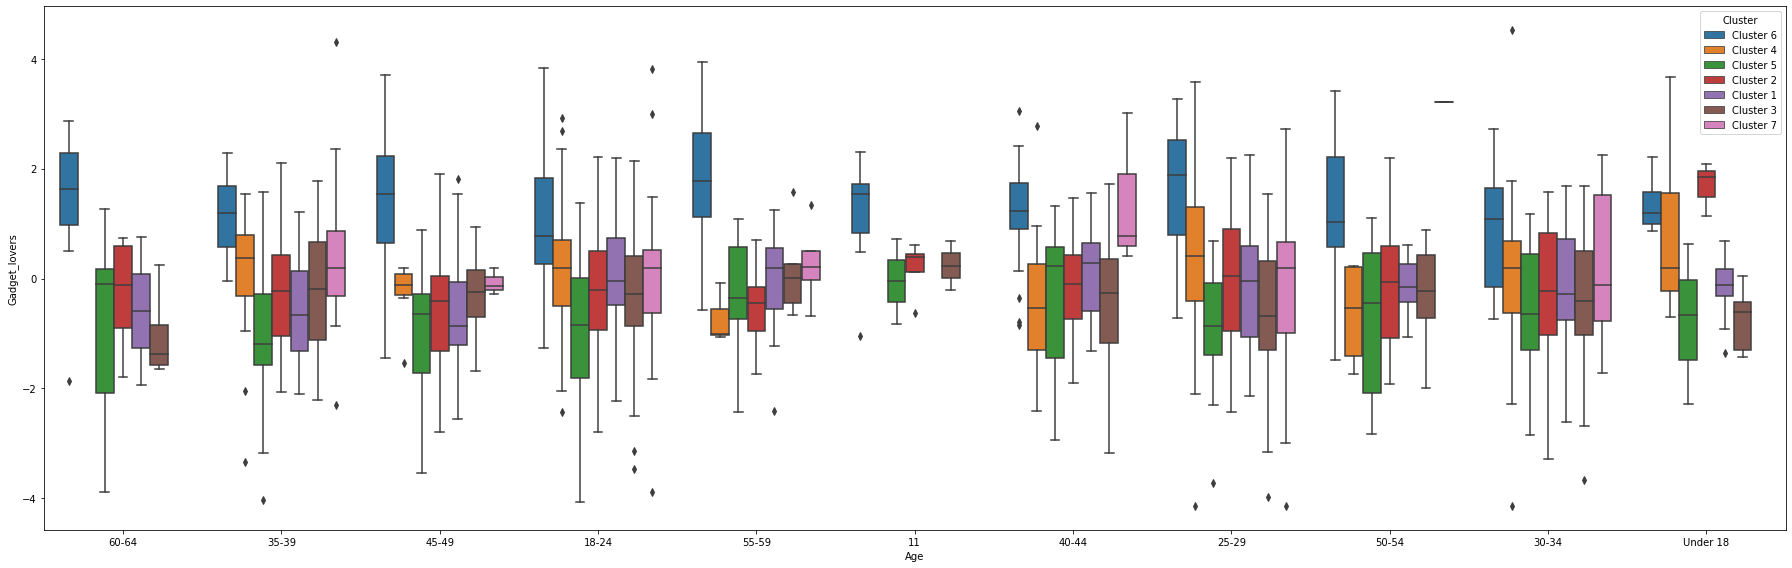

In [53]:
# Age

# Gadget lovers
fig, ax = plt.subplots(figsize = (25, 8))
sns.boxplot(x = 'Age',
            y = 'Gadget_lovers',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

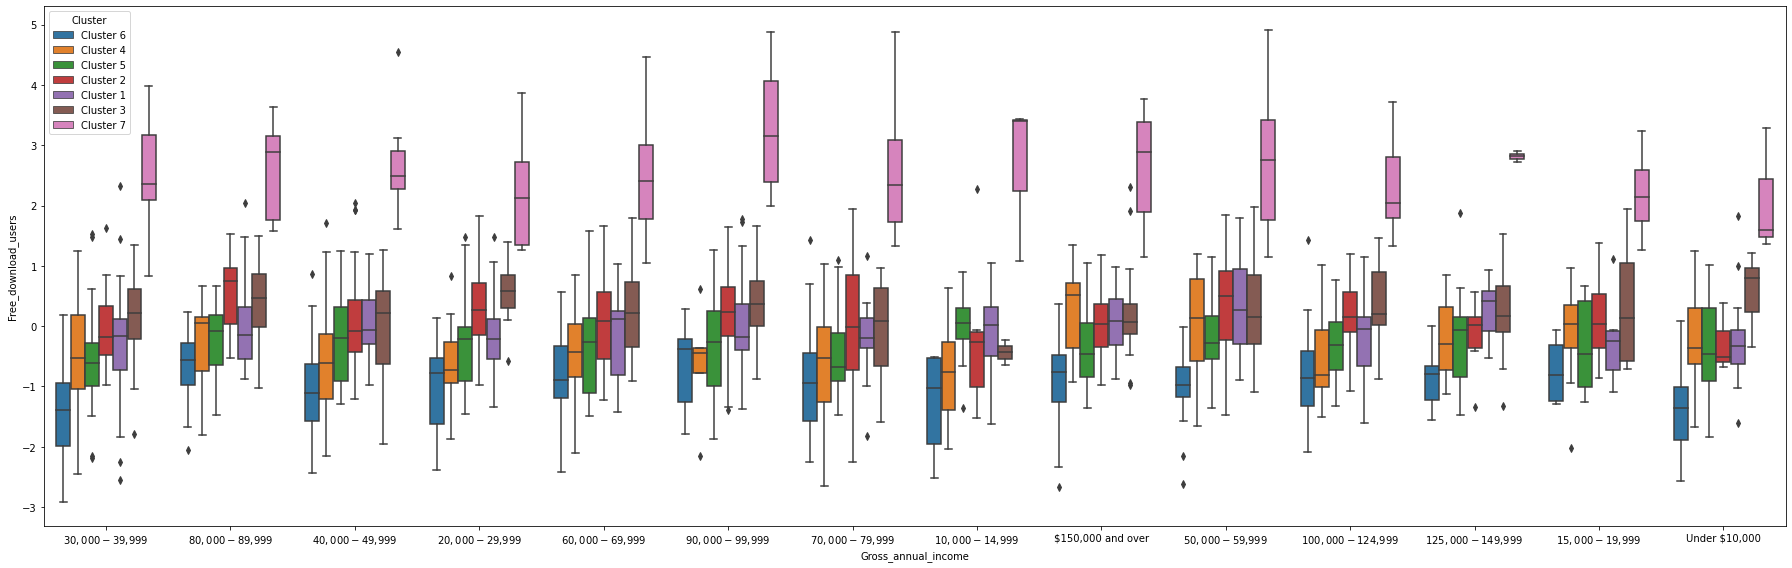

In [62]:

# Annual Income

# Free download users
fig, ax = plt.subplots(figsize = (25, 8))
sns.boxplot(x = 'Gross_annual_income',
            y = 'Free_download_users',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

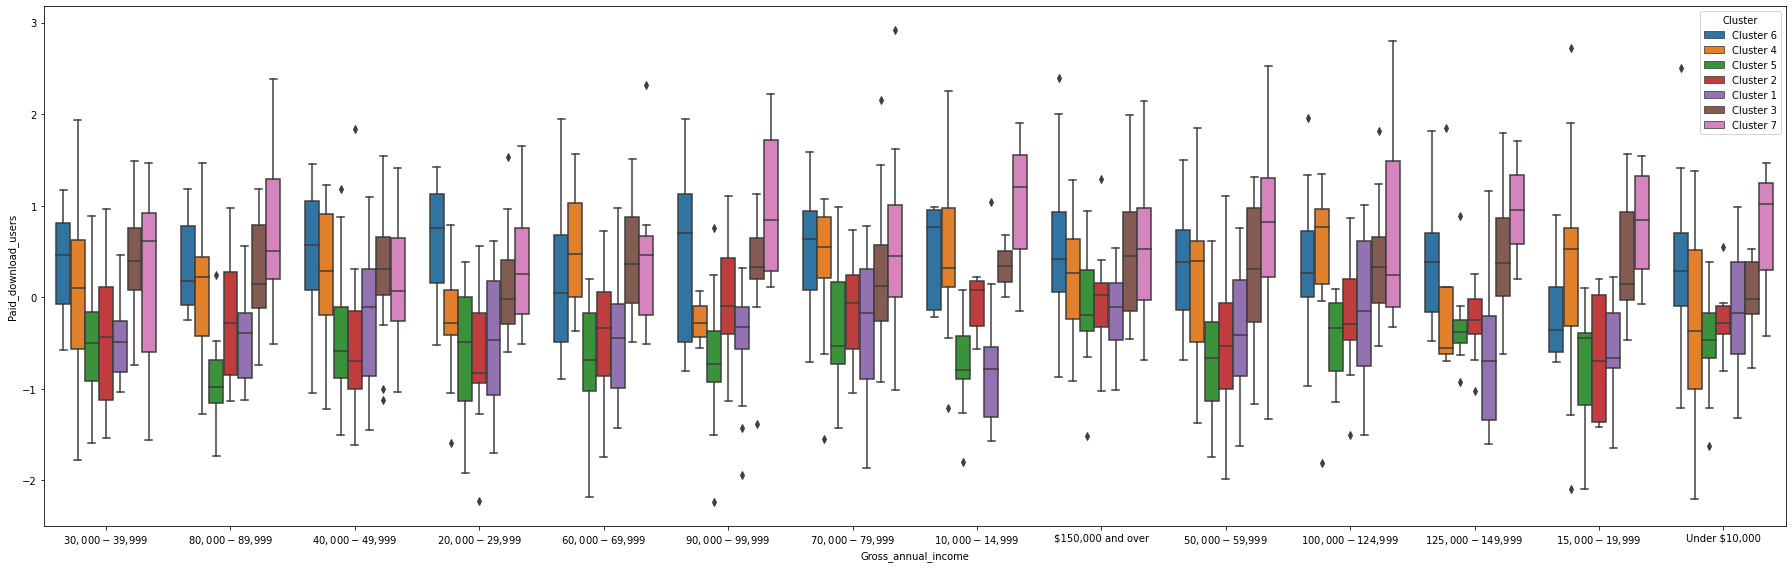

In [61]:
# Annual Income

# Paid download Users
fig, ax = plt.subplots(figsize = (25, 8))
sns.boxplot(x = 'Gross_annual_income',
            y = 'Paid_download_users',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# . Analysis Report

    Millions of apps are downloaded for different reasons and determining how consumer behavior influences the download of mobile applications is something to take into consideration. Prior to our analysis, we suffered some strange download behavior with our consumers and as such we relied on data exploration and analysis to help with how consumer behavior influences mobile app download. As much as you would want to spend money, having children would reduce the rate at which money is spent and would put more emphasis on discounts and bargain.<br><br>

    In this report we describe the analysis that we have done so far in order to understand our customers’ needs and find a way to improve the number of the downloads based on customer behavior. During the analysis we found out a lot of information about people downloading our apps; the reasons why they do/don’t do it, whether they are free downloads or paid ones and other data that we will discuss in the paragraphs below.<br><br>

    While running our analysis we noticed that there is one consumer that didn’t like neither free nor paid apps. This consumer is supposedly a person with good leadership skills, possibly has a top-level business role or something like it. He or she is not a family person, and not a parent either. Another consumer is not fond of free apps and is not a gadget lover. He/she prefers paid applications and looking at this factor we can conclude that this is a working person with a higher-than-average income since our records show that this person loves luxury and designer brands. He/she is a young person on top of his career path since the analysis also shows that it is not a family person. The other one is somewhat like the previous customer, but the analysis showed some differences. For instance, this person has no time for some free apps and uses only the paid ones. Since paid applications are usually for professional use, we can assume that this is also a working person but with quite average income, not interested in luxury brands and probably a family person. 
    We noticed another customer using a lot of apps. This customer is not a leader and likes to use gadget apps. So, we assume this customer is an employee without a high position and busy work, with a middle education level and middle income person, usually having a lot of time to spend on APP. He/she likes to use apps for connecting with family, friends on social platforms, watching news, or some lifestyle apps. And since this customer has children, they may download apps to their children for education or for fun. The last customer we found from our analysis is that they do not have time to use any paid or free downloads. He/she is a millennial who usually has avant-garde thinking, strong sense of consumption management, higher education level and high income, and this customer would like to spend more money on luxury brands and lifestyle. only use the gadget apps in daily life due to busy work or family and children.<br><br>




# . CONCLUSION
	In conclusion, we would suggest focusing on our target consumers. We have people that would download the applications but something (it could be a lot of things) prevents them from doing that. As stated earlier, there are a lot of factors that influence people to avoid downloading a lot of apps and for each person they can be different. The one option could be to reach out to our customers directly through the email and ask them to fill out the survey. We understand that people tend to ignore such kinds of emails but if we present it in the right way, we can possibly gather valuable information and run the analysis on that data. It will help us to understand our target consumers' needs and wishes and therefore improve the number of downloads. 

